## Applied Exercises

We have used several classic test datasets throughout this semester. The “data” folder on Github contains 10 datasets we’ve used.\
Choose a dataset, and decide if you are going to perform a regression or a classification\
(remember you can always add a target class/column based on the data, like “expensive is a top 50%”)

Things that need to be done:
1)	Load data
2)	Clean data (drop columns, fill/drop nulls)
3)	Generate Test/Train sets

For EACH of our 4 decision trees (**Basic, bagged, random forest, gradient boosted**)
1)	Use GridsearchCV (or randomgridsearch) to test a range of hyperparameters
2)	Using the best parameter, build the model and evaluate performance on test set
3)	Generate some visual output\
a. Could be a graph of errors on the y and number of trees on the x\
b.	A printout of a subtree with a short explanation of what is shows\
c.	Anything else you can think of

Summarize your results, highlight important/unexpected results, theorize on why the best method ended up performing the best.

### Data Preparation

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='Set2')

In [268]:
df = pd.read_csv('data/titanic.csv')
df = df.set_index('PassengerId')
# drop text vars and categorical vars that do not likely affect outcomes
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.7+ KB


In [270]:
# compare stats for passengers with null ages
df_nulls = df.copy(deep=True)
df_nulls['null_age'] = df_nulls['Age'].isnull()
df_nulls.select_dtypes(exclude='object')\
    .drop('Age', axis=1)\
    .groupby('null_age')\
    .agg(['mean', 'median', 'std'])

Survived                     Pclass                      SibSp  \
              mean median       std      mean median       std      mean   
null_age                                                                   
False     0.406162    0.0  0.491460  2.236695    2.0  0.838250  0.512605   
True      0.293785    0.0  0.456787  2.598870    3.0  0.763216  0.564972   

                              Parch                        Fare           \
         median       std      mean median       std       mean   median   
null_age                                                                   
False       0.0  0.929783  0.431373    0.0  0.853289  34.694514  15.7417   
True        0.0  1.626316  0.180791    0.0  0.534145  22.158567   8.0500   

                     
                std  
null_age             
False     52.918930  
True      31.874608

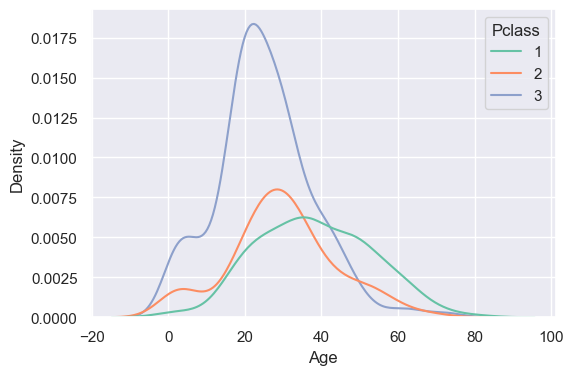

In [271]:
# significant difference in Pclass (median of 2 for non-null, 3 for null)
# compare age distribution by Pclass
plt.figure(figsize=(6,4))
sns.kdeplot(df, x='Age', hue='Pclass', palette='Set2')
plt.show()

In [272]:
# fill nulls by Pclass median
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))

In [273]:
# create dummy variables
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [274]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=82)

### Basic Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [317]:
dtree = DecisionTreeClassifier(random_state=82)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[137  33]
 [ 27  71]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       170
           1       0.68      0.72      0.70        98

    accuracy                           0.78       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
dtree = DecisionTreeClassifier(random_state=82)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(1, 5)),
    'min_samples_split': np.arange(2,5),
    'min_samples_leaf': np.arange(3,10),
    'max_features': [None, 'sqrt'],
    'class_weight': [None, 'balanced']
}
dtree_grid = GridSearchCV(dtree, param_grid, verbose=2)
dtree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=3, min

GridSearchCV(estimator=DecisionTreeClassifier(random_state=82),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, np.int64(1), np.int64(2),
                                       np.int64(3), np.int64(4)],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4])},
             verbose=2)

In [ ]:
print(dtree_grid.best_params_)
dtree_best = DecisionTreeClassifier(**dtree_grid.best_params_)
dtree_best.fit(X_train, y_train)
y_pred = dtree_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': np.int64(4), 'max_features': None, 'min_samples_leaf': np.int64(3), 'min_samples_split': np.int64(2)}
[[148  22]
 [ 31  67]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       170
           1       0.75      0.68      0.72        98

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



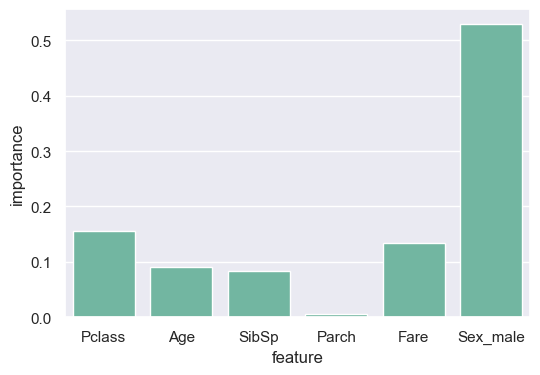

In [445]:
dtree_importances = pd.DataFrame({
    'feature': dtree_best.feature_names_in_,
    'importance': dtree_best.feature_importances_
})

plt.figure(figsize=(6,4))
sns.barplot(dtree_importances, x='feature', y='importance')
plt.show()

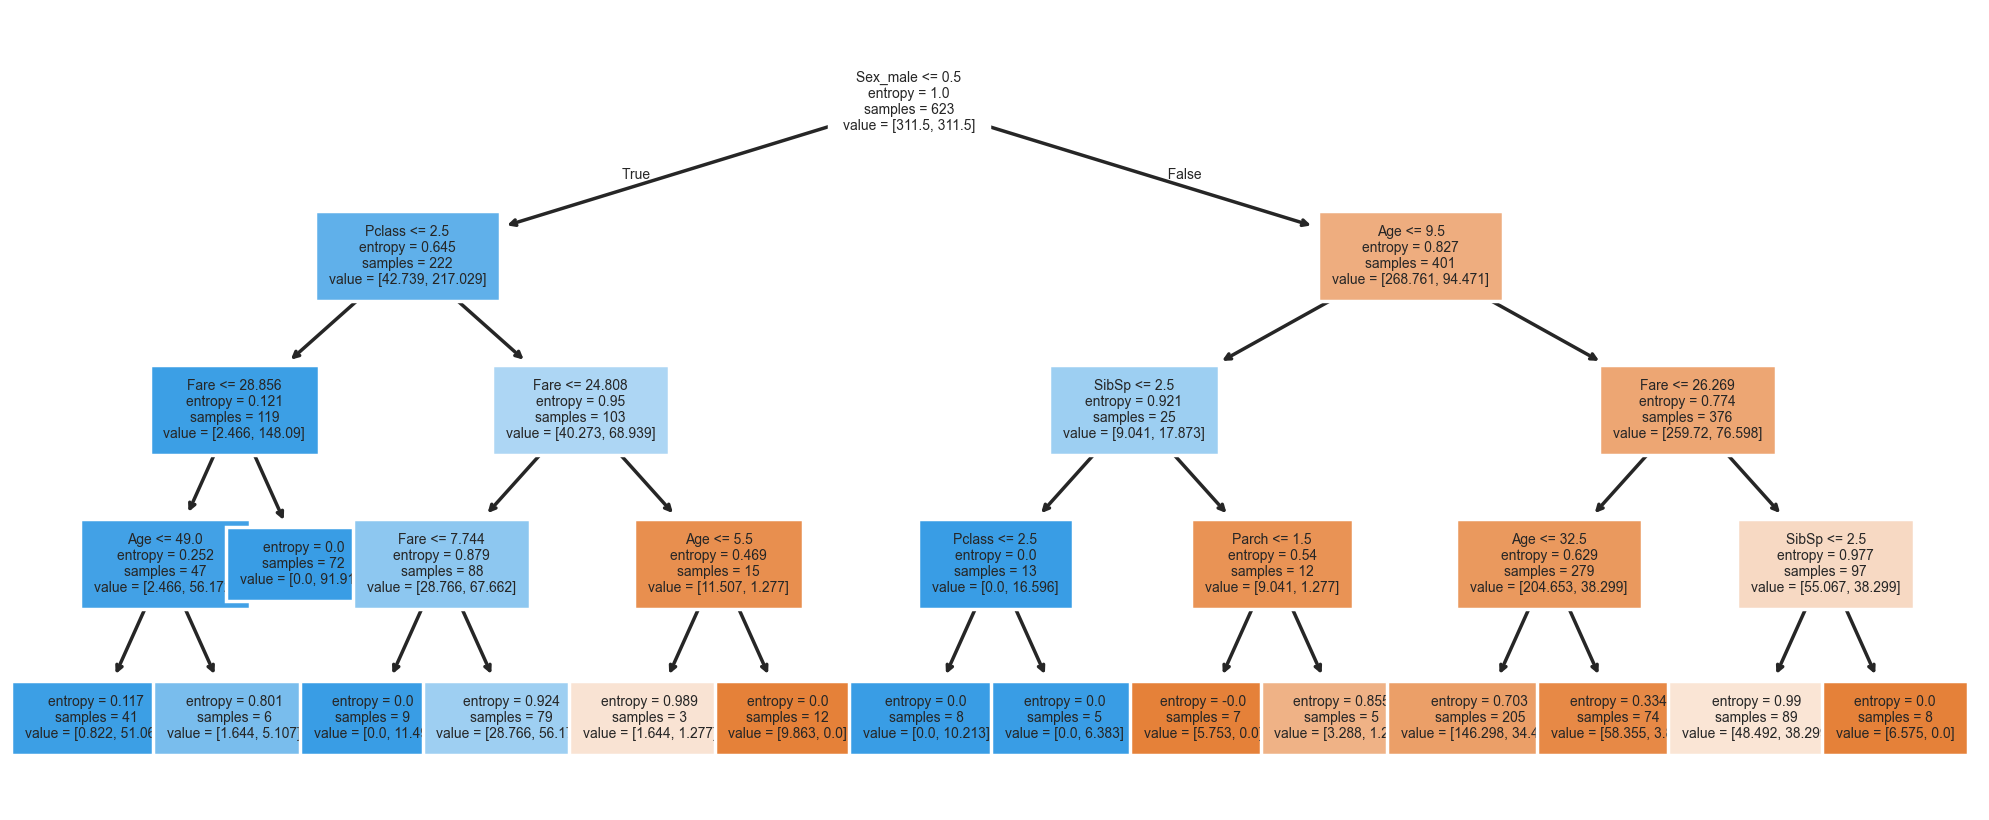

In [522]:
plt.figure(figsize=(10, 4), dpi=250)
plot_tree(dtree_best, filled=True, feature_names=X.columns, fontsize=4)
plt.show()

### Bagged Trees

In [395]:
from sklearn.ensemble import BaggingClassifier

In [397]:
base_tree = DecisionTreeClassifier(random_state=82)
bt = BaggingClassifier(base_tree, random_state=82)
bt.fit(X_train, y_train)
y_pred = bt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[144  26]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       170
           1       0.74      0.74      0.74        98

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
bt = BaggingClassifier(base_tree, random_state=82)
param_grid = {
    'n_estimators': np.arange(50, 301, 50),
    'max_samples': np.linspace(0, 1.0, 6),
    'max_features': np.linspace(0, 1.0, 6)
}
bt_grid = RandomizedSearchCV(bt, param_grid, n_iter=100, random_state=82, verbose=1, n_jobs=-1)
bt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/envs/dsa_py/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
165 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dsa_py/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/dsa_py/lib/python3.13/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/envs/dsa_py/lib/python3.13/site-packages/sklearn/base.py", line 

RandomizedSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=82),
                                               random_state=82),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                                        'max_samples': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300])},
                   random_state=82, verbose=1)

In [410]:
print(bt_grid.best_params_)
bt_best = RandomForestClassifier(**bt_grid.best_params_)
bt_best.fit(X_train, y_train)
y_pred = bt_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'n_estimators': np.int64(250), 'max_samples': np.float64(0.4), 'max_features': np.float64(0.8)}
[[151  19]
 [ 27  71]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       170
           1       0.79      0.72      0.76        98

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



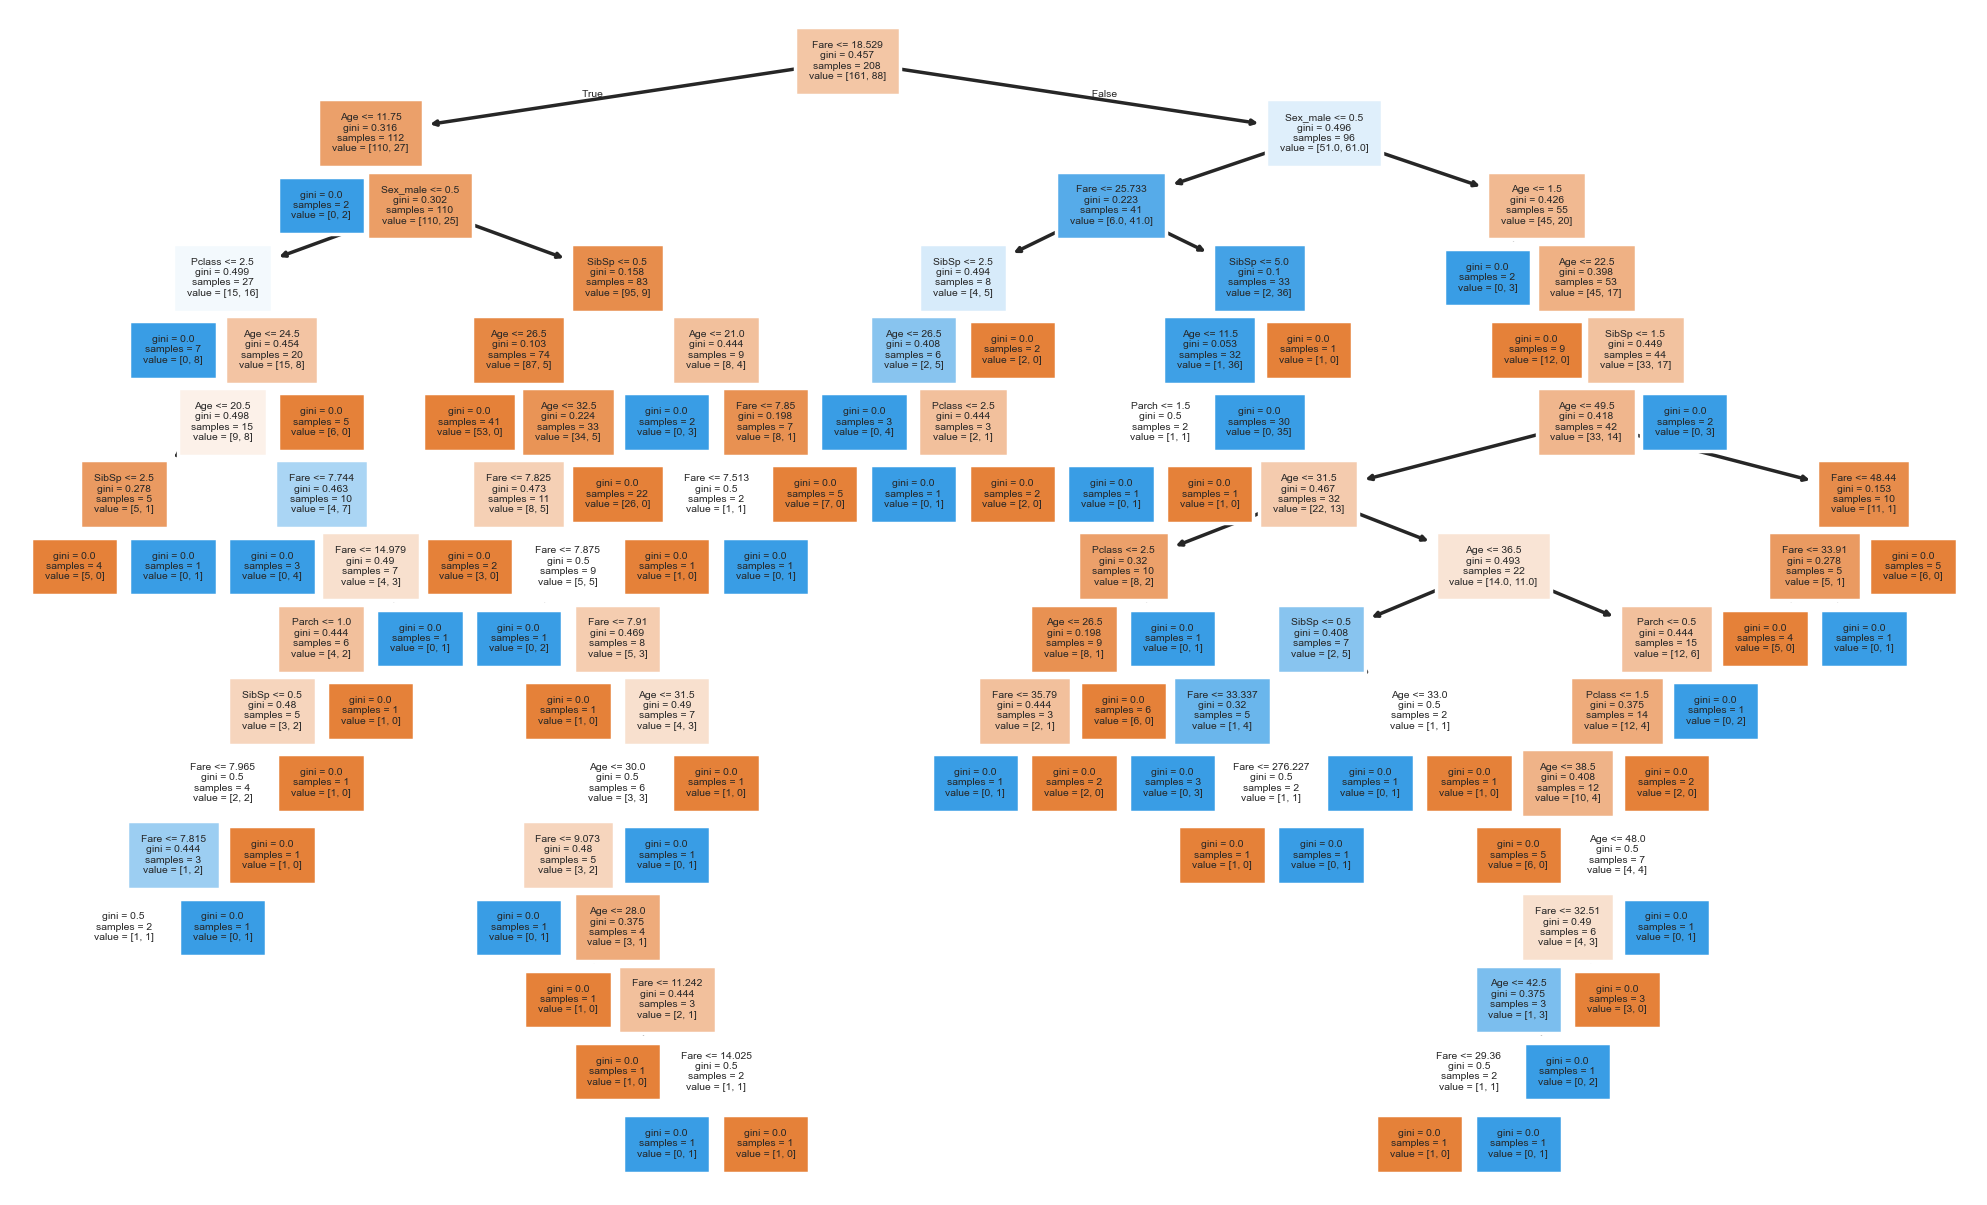

In [ ]:
# sample tree
plt.figure(figsize=(10, 6), dpi=250)
plot_tree(bt_best.estimators_[0], filled=True, feature_names=X.columns, fontsize=3)
plt.show()

### Random Forest

In [324]:
from sklearn.ensemble import RandomForestClassifier

In [327]:
rf = RandomForestClassifier(random_state=82)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[142  28]
 [ 26  72]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       170
           1       0.72      0.73      0.73        98

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [ ]:
rf = RandomForestClassifier(random_state=82)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 25],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}
rf_grid = RandomizedSearchCV(rf, param_grid, n_iter=100, random_state=82, verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=82),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10, 15, 25],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300])},
                   random_state=82, verbose=1)

In [354]:
print(rf_grid.best_params_)
rf_best = RandomForestClassifier(**rf_grid.best_params_)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'n_estimators': np.int64(100), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}
[[146  24]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       170
           1       0.75      0.74      0.75        98

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



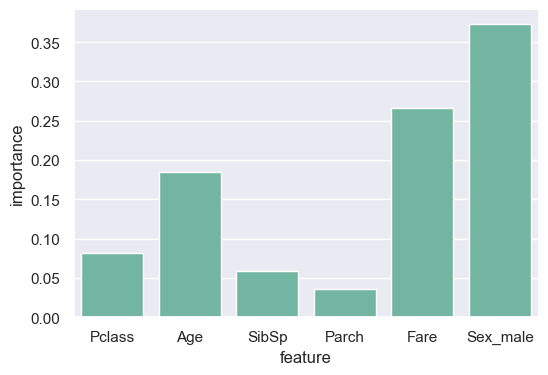

In [444]:
rf_importances = pd.DataFrame({
    'feature': rf_best.feature_names_in_,
    'importance': rf_best.feature_importances_
})

plt.figure(figsize=(6,4))
sns.barplot(rf_importances, x='feature', y='importance')
plt.show()

In [495]:
rf_best.estimators_[0]

DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_split=10,
                       random_state=480676494)

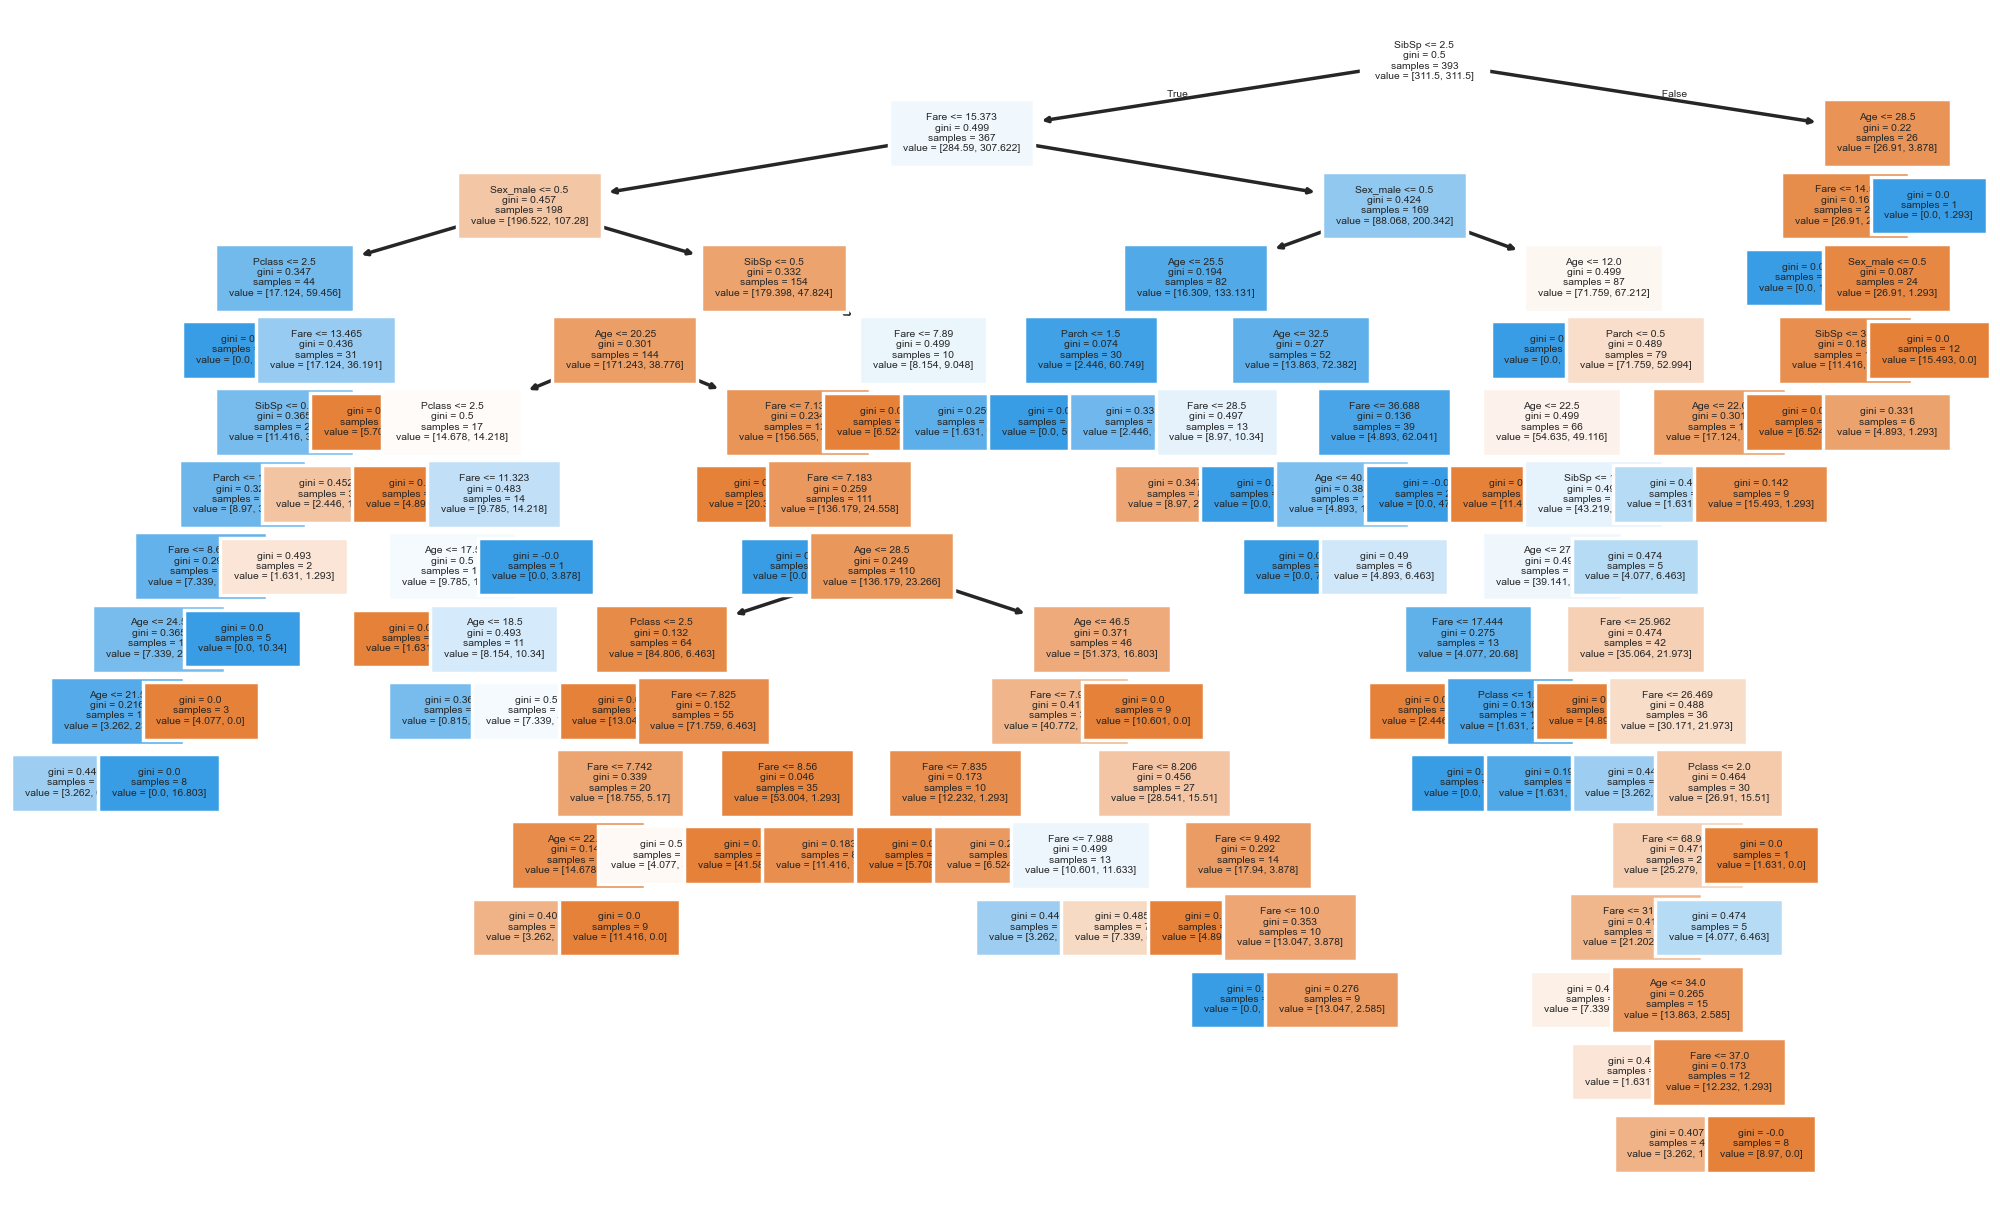

In [508]:
plt.figure(figsize=(10, 6), dpi=250)
plot_tree(rf_best.estimators_[0], filled=True, feature_names=X.columns, fontsize=3)
plt.show()

### Gradient Boosted Tree

In [466]:
from sklearn.ensemble import GradientBoostingClassifier

In [478]:
gb = GradientBoostingClassifier(random_state=82)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[152  18]
 [ 26  72]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       170
           1       0.80      0.73      0.77        98

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.84      0.83       268



In [482]:
gb = GradientBoostingClassifier(random_state=82)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': np.arange(1, 21, 2),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 9),
    'subsample': [0.6, 0.8, 1.0]
}
gb_grid = RandomizedSearchCV(gb, param_grid, n_iter=200, random_state=82, verbose=1, n_jobs=-1)
gb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=82),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300]),
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=82, verbose=1)

In [483]:
print(gb_grid.best_params_)
gb_best = GradientBoostingClassifier(**gb_grid.best_params_)
gb_best.fit(X_train, y_train)
y_pred = gb_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'subsample': 0.8, 'n_estimators': np.int64(250), 'min_samples_split': np.int64(18), 'min_samples_leaf': np.int64(8), 'max_depth': np.int64(3), 'learning_rate': 0.05}
[[147  23]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       170
           1       0.76      0.74      0.75        98

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



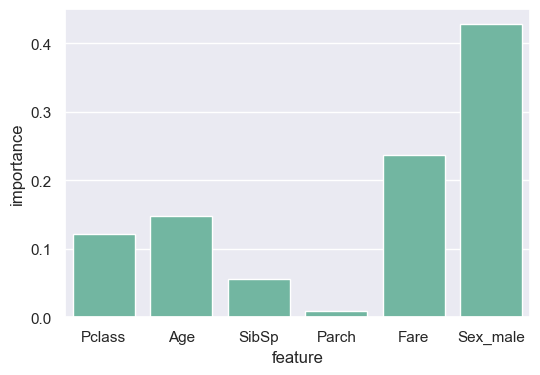

In [484]:
gb_importances = pd.DataFrame({
    'feature': gb_best.feature_names_in_,
    'importance': gb_best.feature_importances_
})

plt.figure(figsize=(6,4))
sns.barplot(gb_importances, x='feature', y='importance')
plt.show()

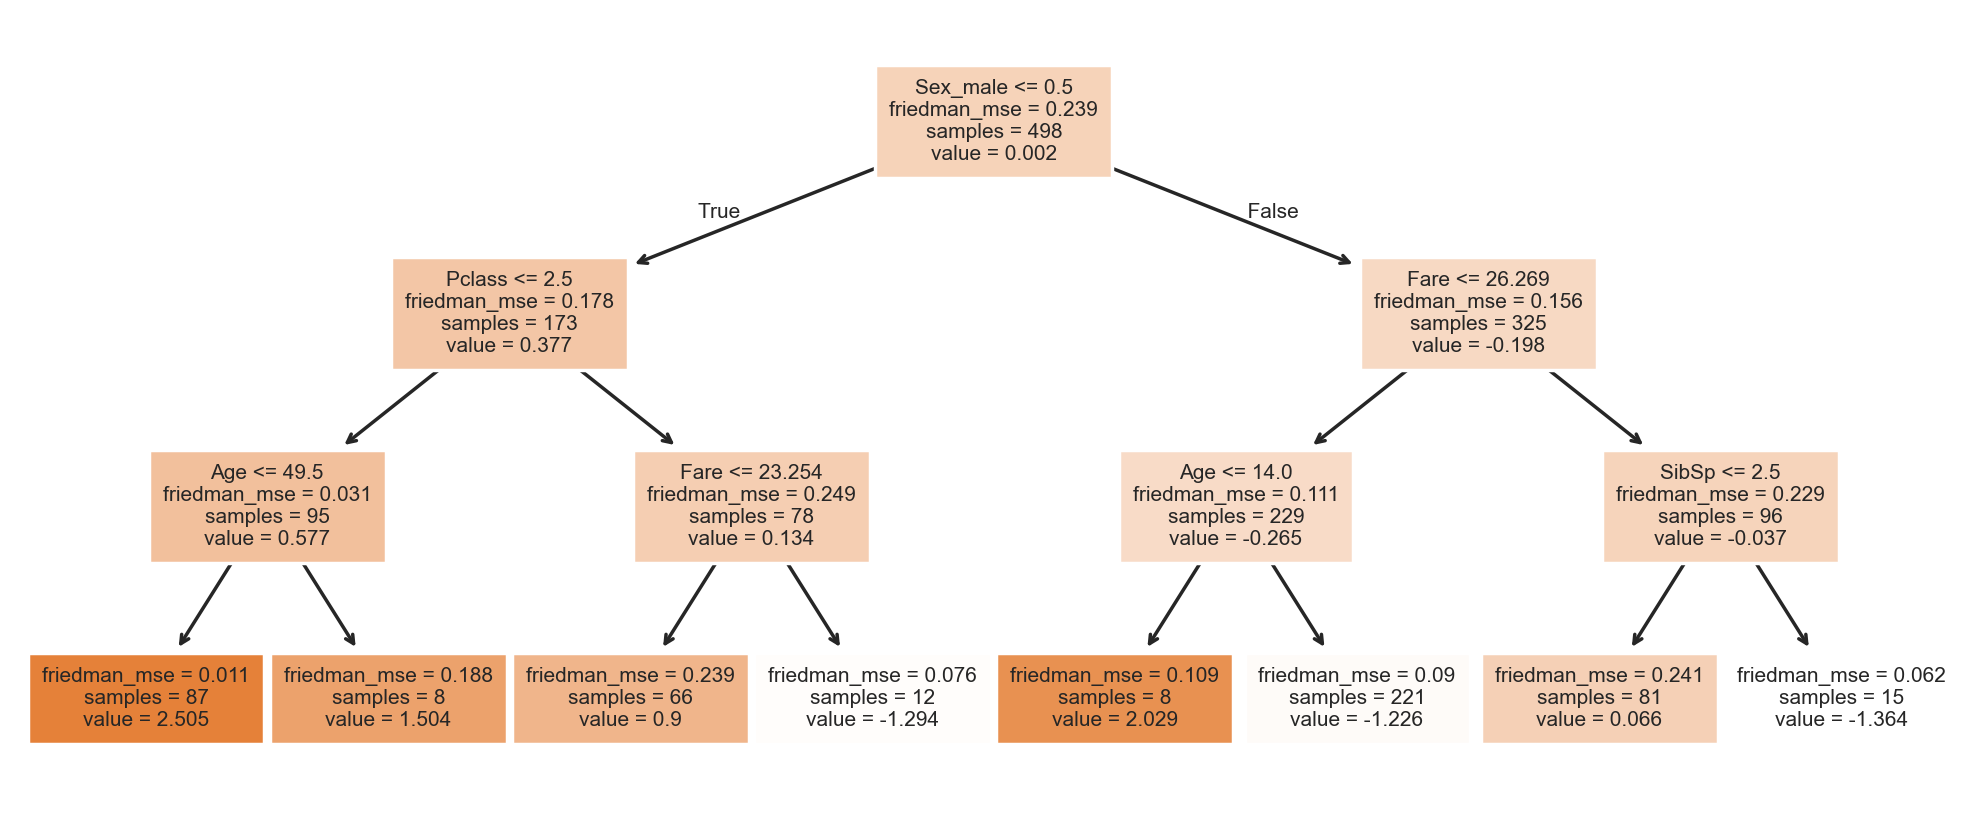

In [525]:
plt.figure(figsize=(10, 4), dpi=250)
plot_tree(gb_best.estimators_[0][0], filled=True, feature_names=X.columns, fontsize=6)
plt.show()

### Discussion
All of the tree methods performed similarly in this case, though the very best results were obtained with Gradient Boosting. Interestingly, the default gradient-boosted classifier performed better than the 'best' result from a randomized grid search (even after testing multiple parameter grids with increasingly expansive search spaces). This was also the cases for Random Forest. It is possible that the grid search output was overfitting to the train data.

The 'best' result of the Bagged Classifer performed just slightly under Gradient Boosting, followed closely by Random Forest. The basic Decision Tree was actually not too far behind, in this case.

Overall, none of the results were particularly great, with the highest f1-score being 0.84. I suspect this may be the result of limited training data, as there were under 900 entries in the entire dataset. This may also be what hindered the grid search for Gradient Boosting and Random Forest.
